# A/B Test Simulation Using the Fake Store API

This notebook demonstrates a simple A/B test simulation using product data from the publicly accessible [Fake Store API](https://fakestoreapi.com/).

We will:
- Fetch product data
- Simulate user behavior with A/B groups
- Calculate and visualize click-through rates (CTR)
- Conduct a basic statistical significance test

Let's start by importing the necessary Python libraries.

In [3]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

## Step 1: Fetch Product Data from the Fake Store API

We retrieve product data via an HTTP GET request.  
This data simulates an e-commerce catalog with various items and categories.

In [5]:
url = "https://fakestoreapi.com/products"
response = requests.get(url)
data = response.json()

df_products = pd.DataFrame(data)
df_products.head()


,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"


## Step 2: Simulate A/B Test User Views and Clicks

To model an A/B test scenario:
- Each product is viewed 50 times by unique users.
- Users are randomly assigned to one of two groups: **A** or **B**.
- We simulate click behavior with different probabilities:
  - Group A: 10% click-through rate
  - Group B: 13% click-through rate

This setup will help us test if group B performs better than group A.

In [6]:
# Simulate 50 views per product
df = pd.concat([df_products]*50, ignore_index=True)
df["user_id"] = np.arange(len(df))

# Randomly assign to group A or B
df["group"] = np.random.choice(["A", "B"], size=len(df))

# Simulate click-throughs (A: 10%, B: 13%)
df["clicked"] = df["group"].apply(lambda x: np.random.rand() < (0.10 if x == "A" else 0.13)).astype(int)

df.head()

,id,title,price,description,category,image,rating,user_id,group,clicked
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}",0,B,0
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}",1,A,0
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}",2,B,0
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}",3,B,0
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}",4,A,0


## Step 3: Calculate Click-Through Rate (CTR) per Group

We aggregate the clicks and views per group to calculate the CTR,  
which is defined as the ratio of clicks to total views in each group.

In [7]:
ctr_summary = df.groupby("group")["clicked"].agg(["count", "sum"])
ctr_summary["CTR"] = ctr_summary["sum"] / ctr_summary["count"]
ctr_summary


,count,sum,CTR
group,,,
A,488,46,0.094262
B,512,47,0.091797


## Step 4: Visualize Click-Through Rates

Here, we visualize the average click-through rate for each group using a bar plot.  
The plot includes 95% confidence intervals to indicate uncertainty around the estimates.

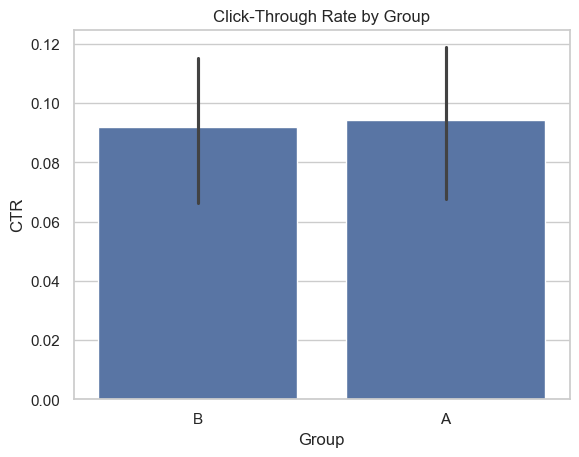

In [9]:
sns.barplot(data=df, x="group", y="clicked", estimator="mean", errorbar=('ci', 95))
plt.title("Click-Through Rate by Group")
plt.ylabel("CTR")
plt.xlabel("Group")
plt.show()

## Interpretation of Click-Through Rates (CTR)

The table above shows the CTR for groups A and B:

- Group A has a CTR of around 9,4%, and Group B around 9,2%, based on the simulated data.
- This suggests that Group A users clicked more often than Group B users.
- However, without a formal statistical test, we cannot say for sure whether this difference is significant or just due to random chance.

You can optionally perform a statistical test (like a z-test) to confirm if the difference in CTR is statistically meaningful.